In [1]:
import tensorflow as tf
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import imageio
from nst_utils import *

In [2]:
resize("content.jpg","cont_use.jpg",355,355)
resize("style.jpg","styl_use.jpg",355,355)

In [3]:
model=load_vgg_model("imagenet-vgg-verydeep-19.mat",355,355)
print(model)

{'input': <tf.Variable 'Variable:0' shape=(1, 355, 355, 3) dtype=float32_ref>, 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 355, 355, 64) dtype=float32>, 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 355, 355, 64) dtype=float32>, 'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 178, 178, 64) dtype=float32>, 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 178, 178, 128) dtype=float32>, 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 178, 178, 128) dtype=float32>, 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 89, 89, 128) dtype=float32>, 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 89, 89, 256) dtype=float32>, 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 89, 89, 256) dtype=float32>, 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 89, 89, 256) dtype=float32>, 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 89, 89, 256) dtype=float32>, 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 45, 45, 256) dtype=float32>, 'conv4_1': <tf.Tensor 'Relu_8:0' shape=(1, 45, 45, 512) dtype=float32>, 'conv4_2': <tf.Tensor 'Relu_9:0' shape=(1,

In [4]:
def content_cost(a_C,a_G):
    m,n_H,n_W,n_C=a_G.get_shape().as_list()
    a_C_unrolled=tf.reshape(tf.transpose(a_C,[0,3,1,2]),[m,n_H*n_W,n_C])
    a_G_unrolled=tf.reshape(tf.transpose(a_G,[0,3,1,2]),[m,n_H*n_W,n_C])
    return tf.reduce_sum(tf.square(a_C_unrolled-a_G_unrolled))/(4*n_H*n_W)

In [5]:
def gram_matrix(A):
    return tf.matmul(A,tf.transpose(A))

In [6]:
def style_layer_cost(a_S,a_G):
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    a_S = tf.reshape(tf.transpose(a_S,[0,3,1,2]),[n_C,n_H*n_W])
    a_G = tf.reshape(tf.transpose(a_G,[0,3,1,2]),[n_C,n_H*n_W])


    GS = gram_matrix(a_S)
    GG = gram_matrix(a_G)

    J_style_layer = tf.reduce_sum(tf.square(tf.subtract(GS,GG)))/((2*n_C*n_W*n_H)**2)
    
    return J_style_layer

In [7]:
STYLE_LAYERS = [
    ('conv1_1', 0.3),
    ('conv2_1', 0.3),
    ('conv3_1', 0.3),
    ('conv4_1', 0.3),
    ('conv5_1', 0.3),
    ('conv5_2', 0.3)]

In [8]:
sess=tf.Session()

In [9]:
def style_cost(model,STYLE_LAYERS):
    j_style=0
    for layer_name,coeff in STYLE_LAYERS:
        out=model[layer_name]
        a_S=sess.run(out)
        a_G=out
        j=style_layer_cost(a_S,a_G)
        j_style=j_style+coeff*j
    return j_style

In [10]:
def total_cost(j_content,j_style,alpha=10,beta=40):
    j_total=alpha*j_content+beta*j_style
    return j_total


In [11]:
import imageio
content=imageio.imread("cont_use.jpg")
content=reshape_and_normalize_image(content)

In [12]:
style=imageio.imread("styl_use.jpg")
style=reshape_and_normalize_image(style)

In [13]:
style.shape

(1, 355, 355, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


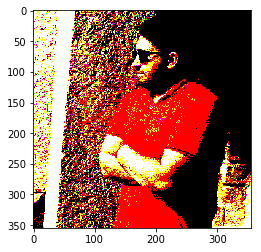

In [14]:
generated_image = generate_noise_image(content)
imshow(generated_image[0])

In [15]:
model=load_vgg_model("imagenet-vgg-verydeep-19.mat",355,355)
print(model)

{'input': <tf.Variable 'Variable_1:0' shape=(1, 355, 355, 3) dtype=float32_ref>, 'conv1_1': <tf.Tensor 'Relu_16:0' shape=(1, 355, 355, 64) dtype=float32>, 'conv1_2': <tf.Tensor 'Relu_17:0' shape=(1, 355, 355, 64) dtype=float32>, 'avgpool1': <tf.Tensor 'AvgPool_5:0' shape=(1, 178, 178, 64) dtype=float32>, 'conv2_1': <tf.Tensor 'Relu_18:0' shape=(1, 178, 178, 128) dtype=float32>, 'conv2_2': <tf.Tensor 'Relu_19:0' shape=(1, 178, 178, 128) dtype=float32>, 'avgpool2': <tf.Tensor 'AvgPool_6:0' shape=(1, 89, 89, 128) dtype=float32>, 'conv3_1': <tf.Tensor 'Relu_20:0' shape=(1, 89, 89, 256) dtype=float32>, 'conv3_2': <tf.Tensor 'Relu_21:0' shape=(1, 89, 89, 256) dtype=float32>, 'conv3_3': <tf.Tensor 'Relu_22:0' shape=(1, 89, 89, 256) dtype=float32>, 'conv3_4': <tf.Tensor 'Relu_23:0' shape=(1, 89, 89, 256) dtype=float32>, 'avgpool3': <tf.Tensor 'AvgPool_7:0' shape=(1, 45, 45, 256) dtype=float32>, 'conv4_1': <tf.Tensor 'Relu_24:0' shape=(1, 45, 45, 512) dtype=float32>, 'conv4_2': <tf.Tensor 'Relu

In [17]:
sess.run(model['input'].assign(content))
out=model["conv4_2"]
a_C=sess.run(out)
a_G=out
j_content=content_cost(a_C,a_G)

In [18]:
sess.run(model['input'].assign(style))
j_style=style_cost(model,STYLE_LAYERS)

In [19]:
J = total_cost(j_content,j_style,alpha=20,beta=40)

In [20]:
optimizer=tf.train.AdamOptimizer(2.0)
train_step=optimizer.minimize(J)

In [21]:
def modelnn(sess,input_image,iters=300):
    sess.run(tf.global_variables_initializer())
    sess.run(model['input'].assign(input_image))
    for i in range(iters):
        sess.run(train_step)
        generated_image=sess.run(model['input'])
        if i%20 == 0:
            Jt, Jc, Js = sess.run([J, j_content, j_style])
            print("Iteration " + str(i) + " :")
            print("total cost = " + str(Jt))
            print("content cost = " + str(Jc))
            print("style cost = " + str(Js))
            
            # save current generated image in the "/output" directory
            save_image(str(i) + ".jpg", generated_image)
    
    # save last generated image
    save_image('generated_image.jpg', generated_image)
    
    return generated_image

In [22]:
modelnn(sess,generated_image)

Iteration 0 :
total cost = 6425168400.0
content cost = 9548164.0
style cost = 155855140.0
Iteration 20 :
total cost = 1311607800.0
content cost = 11476957.0
style cost = 27051716.0
Iteration 40 :
total cost = 653461900.0
content cost = 11950840.0
style cost = 10361126.0
Iteration 60 :
total cost = 461927940.0
content cost = 11619816.0
style cost = 5738290.0
Iteration 80 :
total cost = 383392000.0
content cost = 11061100.0
style cost = 4054250.0
Iteration 100 :
total cost = 338650200.0
content cost = 10578009.0
style cost = 3177250.8
Iteration 120 :
total cost = 308375100.0
content cost = 10195381.0
style cost = 2611687.0
Iteration 140 :
total cost = 286246100.0
content cost = 9882499.0
style cost = 2214903.2
Iteration 160 :
total cost = 269447230.0
content cost = 9624732.0
style cost = 1923815.1
Iteration 180 :
total cost = 256268130.0
content cost = 9410508.0
style cost = 1701449.4
Iteration 200 :
total cost = 245773040.0
content cost = 9226372.0
style cost = 1531140.1
Iteration 220 :

array([[[[  -4.094954 ,   77.39913  ,   -0.8112942],
         [ -27.768984 ,   41.03497  ,   10.593032 ],
         [ -36.28364  ,   -3.5219033,  -12.867611 ],
         ...,
         [ -84.47266  ,  -24.3583   ,   49.374348 ],
         [ -56.78541  ,  -38.56052  ,   57.709877 ],
         [  -3.2209446,   43.930775 ,   39.21884  ]],

        [[  12.270938 ,   75.22348  ,   39.956173 ],
         [ -46.34621  ,   47.1441   ,   33.857452 ],
         [ -56.69604  ,   15.854817 ,   23.356699 ],
         ...,
         [ -88.83627  ,  -60.68547  ,   19.541277 ],
         [ -81.424095 ,  -50.304382 ,   38.751244 ],
         [ -56.445877 ,  -46.709324 ,    2.9691665]],

        [[  42.84179  ,   89.41288  ,   50.656635 ],
         [  -7.5405073,   73.25776  ,   67.22516  ],
         [ -56.17     ,   45.64226  ,   95.18512  ],
         ...,
         [ -83.66983  ,  -27.205769 ,   16.271896 ],
         [ -54.83703  ,  -38.29468  ,   10.845089 ],
         [  16.532562 ,   35.01663  ,   30.788668 ]],